<a href="https://colab.research.google.com/github/manasik29/Simple_Linear_Regression-Assignment/blob/main/Simple_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***1) Delivery_time -> Predict delivery time using sorting time***

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

***Load Data***

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/delivery_time.csv')

In [4]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
#Renaming all columns
df = data.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'}, axis = 1)

In [6]:
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


***EDA***

In [9]:
df.shape

(21, 2)

In [10]:
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [12]:
df.tail()

,Delivery_Time,Sorting_Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [14]:
df.dtypes

Delivery_Time    float64
Sorting_Time       int64
dtype: object

No requirement of transformation or dtype correction

In [21]:
#check for missing values
df.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

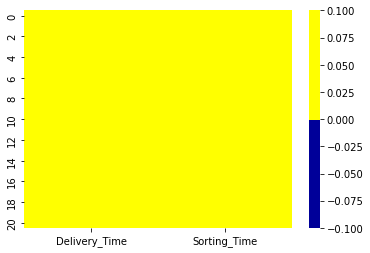

In [22]:
#to genrate heat map
import seaborn as sns
cols = df.columns
colors = ['#000099', '#ffff00']   #define colors, yellow for missing, blue for non missing
sns.heatmap(df[cols].isnull(),
               cmap= sns.color_palette(colors))

Hence we can conclude no missing values

In [23]:
#to check for duplicate rows
df[df.duplicated()].shape

(0, 2)

No duplicate rows

In [15]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7feb78e618d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7feb78ebf290>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feb78e38050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7feb78f0efd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7feb78e61890>,
  <matplotlib.lines.Line2D at 0x7feb78ebf2d0>]}

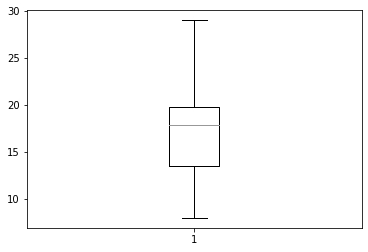

In [17]:
#Outlier Detection
import matplotlib.pyplot as plt
plt.boxplot(df['Delivery_Time'])

In [24]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


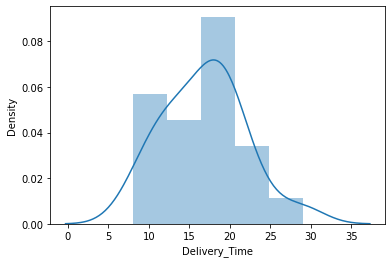

In [25]:
sns.distplot(df.Delivery_Time)

{'boxes': [<matplotlib.lines.Line2D at 0x7feb788f9b10>],
 'caps': [<matplotlib.lines.Line2D at 0x7feb78900b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feb78886bd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7feb78886690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7feb78900110>,
  <matplotlib.lines.Line2D at 0x7feb78900650>]}

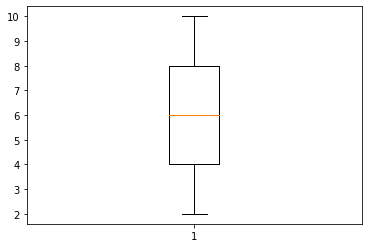

In [19]:
plt.boxplot(df['Sorting_Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


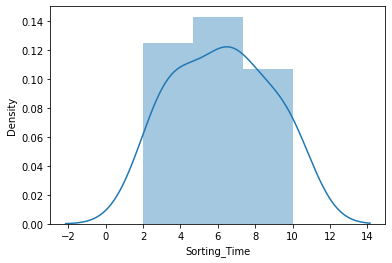

In [26]:
sns.distplot(df.Sorting_Time)

Here, we can coclude there are no outliers.

In [ ]:
#Correlation coef
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


***Fitting a Regression Equation***

In [30]:
import statsmodels.formula.api as smf

In [31]:
model = smf.ols("Delivery_Time~Sorting_Time", data=df).fit()

In [ ]:
#model parameters
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [ ]:
#get t-values & p-values
print(model.tvalues, '\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [ ]:
#r squared value
model.rsquared

0.6822714748417231

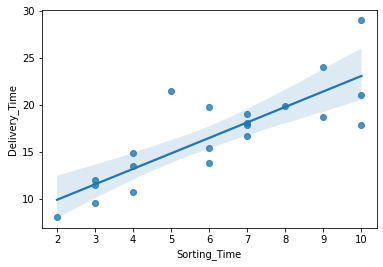

In [ ]:
sns.regplot(x = "Sorting_Time", y = "Delivery_Time", data = df)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 30 May 2022   Prob (F-statistic):           3.98e-06
Time:                        13:30:26   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Residual Analysis***

***Test for Noramlity of Residual through QQ plot***

In [32]:
import statsmodels.api as sm

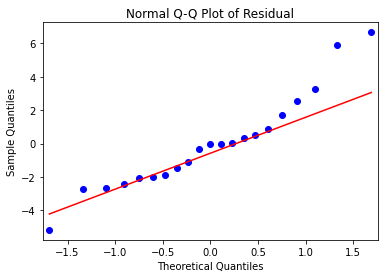

In [33]:
#q line is the 45 degrees line
qqplot = sm.qqplot(model.resid, line= 'q')
plt.title('Normal Q-Q Plot of Residual')
plt.show()

In [34]:
import numpy as np
list(np.where(model.resid>6))

[array([20])]

***Residual plot for Homoscedasticity***

In [35]:
def get_standardize_values( vals): 
  return (vals - vals.mean())/vals.std() # get standardized values of fitted values and residual

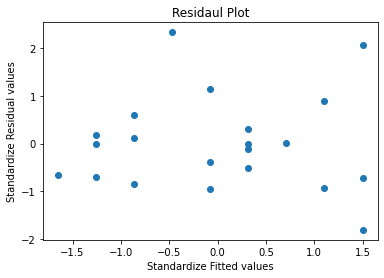

In [36]:
plt.scatter(get_standardize_values(model.fittedvalues), get_standardize_values(model.resid))
plt.ylabel('Standardize Residual values')
plt.xlabel('Standardize Fitted values')
plt.title('Residaul Plot')
plt.show()

***Residual vs Regressors***

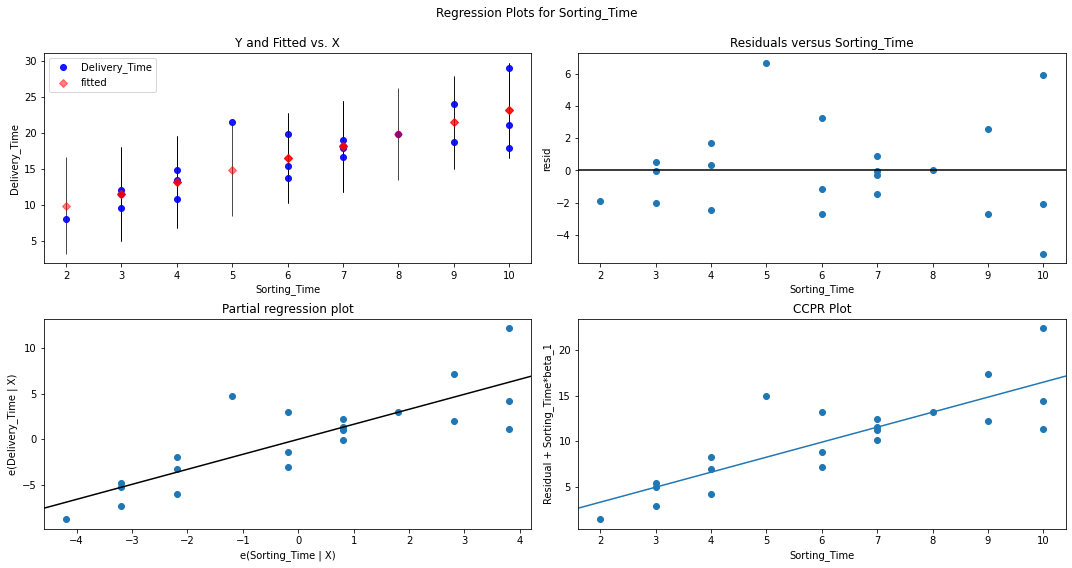

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Sorting_Time", fig=fig)
plt.show()

***Model Deletion by Cook's Distance and Leverage value***

In [42]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


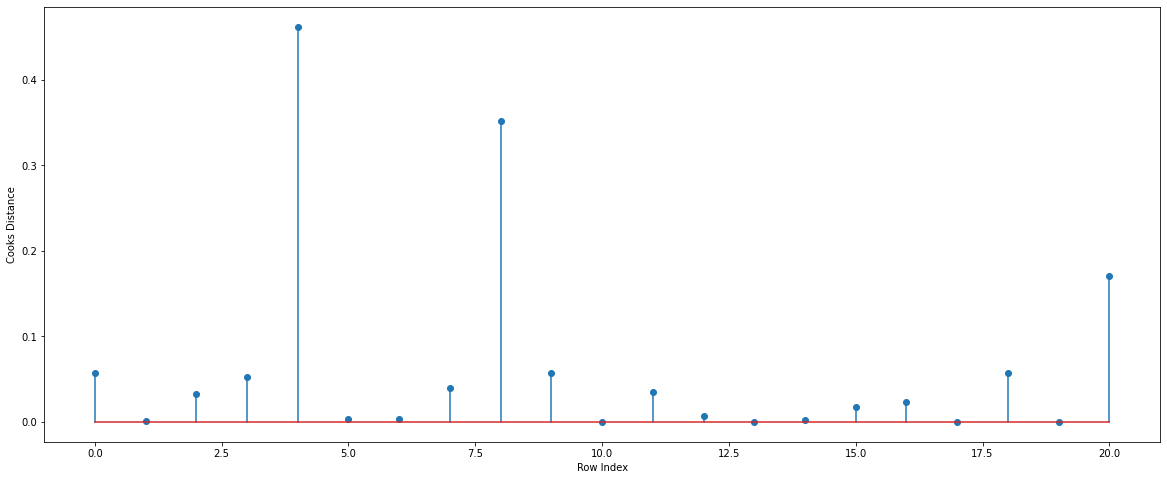

In [43]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(df)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
#index and values of influencers where c is more than .5
(np.argmax(c), np.max(c))

(4, 0.462053041265031)

In [45]:
from statsmodels.graphics.regressionplots import influence_plot


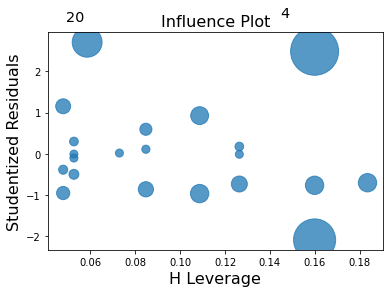

In [46]:
influence_plot(model)
plt.show()

In [47]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*(k+1)/n

In [48]:
leverage_cutoff

0.42857142857142855

From the above plots, as C<1 & leverage_cutoff value is higher than any datapoint, hence we will not delete any datapoint.

***Prediction***

In [ ]:
#Predict Delivery Time for Sorting Time = 5, 10
newdata = pd.Series([5,10])

In [ ]:
data_pred = pd.DataFrame(newdata, columns = ['Sorting_Time'])

In [ ]:
data_pred

,Sorting_Time
0,5
1,10


In [ ]:
model.predict(data_pred)

0    14.827833
1    23.072933
dtype: float64

***2) Salary_hike -> Build a prediction model for Salary_hike***

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

***Load Data***

In [49]:
data_s = pd.read_csv('/content/Salary_Data.csv')

In [50]:
data_s

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [51]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


***EDA***

In [59]:
data_s.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [60]:
data_s.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [52]:
data_s.shape

(30, 2)

In [54]:
data_s.dtypes

YearsExperience    float64
Salary             float64
dtype: object

No need for dtype correction or transformation

In [55]:
#Check for missing values
data_s.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

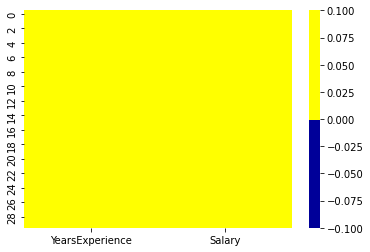

In [58]:
#to genrate heat map
import seaborn as sns
cols = data_s.columns
colors = ['#000099', '#ffff00']   #define colors, yellow for missing, blue for non missing
sns.heatmap(data_s[cols].isnull(),
               cmap= sns.color_palette(colors))

Hence, we can conclude no missing values.

In [57]:
#Check for duplicated values
data_s[data_s.duplicated()].shape

(0, 2)

Hence, no duplicated rows.

In [61]:
#Check for Outliers
data_s.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7feb54e943d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7feb54dbe690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feb54de2090>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7feb54dbe8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7feb54e94b50>,
  <matplotlib.lines.Line2D at 0x7feb54e94410>]}

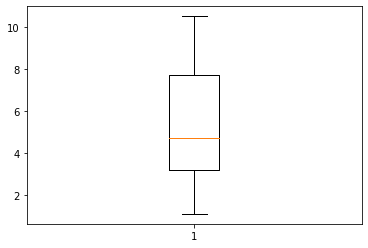

In [62]:
#plot boxplot
plt.boxplot(data_s.YearsExperience)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


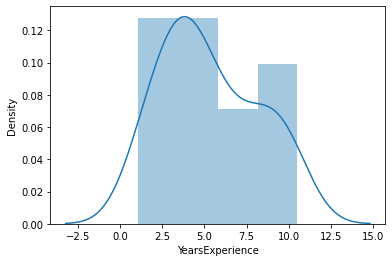

In [63]:
#plot histogram
sns.distplot(data_s.YearsExperience)

{'boxes': [<matplotlib.lines.Line2D at 0x7feb54c96cd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7feb54c9cd50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feb54ca4d90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7feb54ca4850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7feb54c9c2d0>,
  <matplotlib.lines.Line2D at 0x7feb54c9c810>]}

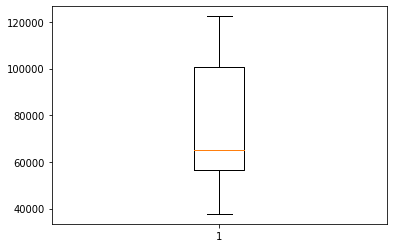

In [64]:
#plot boxplot
plt.boxplot(data_s.Salary)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


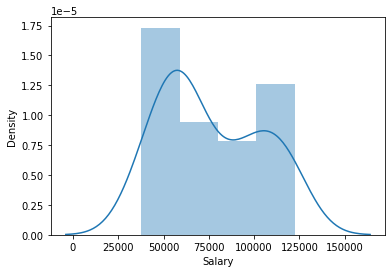

In [65]:
#plot dist plot
sns.distplot(data_s.Salary)

Hence, we can conclude there are no outliers in dataset.

In [ ]:
#Correlation Coefficents
data_s.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


***Fitting a Regression model***

In [66]:
import statsmodels.formula.api as smf

In [67]:
model = smf.ols('Salary~YearsExperience', data = data_s).fit()

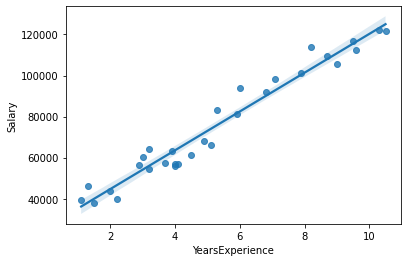

In [68]:
sns.regplot(x = 'YearsExperience', y = 'Salary', data = data_s)

In [69]:
#Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [70]:
#get t-values & p-values
print(model.tvalues, '\n' ,model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [71]:
#get rsquared value
(model.rsquared, model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [90]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 31 May 2022   Prob (F-statistic):           1.14e-20
Time:                        16:14:53   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Residual Analysis***

***Test normality of residual through QQ Plot ***

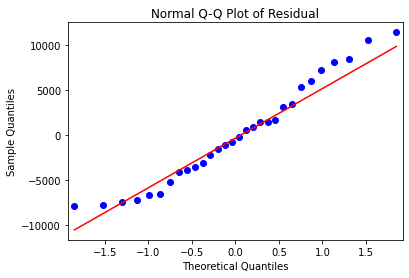

In [72]:
#q line is the 45 degrees line
qqplot = sm.qqplot(model.resid, line= 'q')
plt.title('Normal Q-Q Plot of Residual')
plt.show()


In [73]:
import numpy as np
list(np.where(model.resid>10000))

[array([19, 23])]

Residual Plot for Homoscedasticity

In [74]:
def get_standardize_values( vals): 
  return (vals - vals.mean())/vals.std() # get standardized values of fitted values and residual

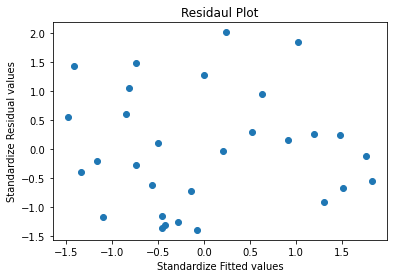

In [75]:
plt.scatter(get_standardize_values(model.fittedvalues), get_standardize_values(model.resid))
plt.ylabel('Standardize Residual values')
plt.xlabel('Standardize Fitted values')
plt.title('Residaul Plot')
plt.show()

Residual vs Regressors

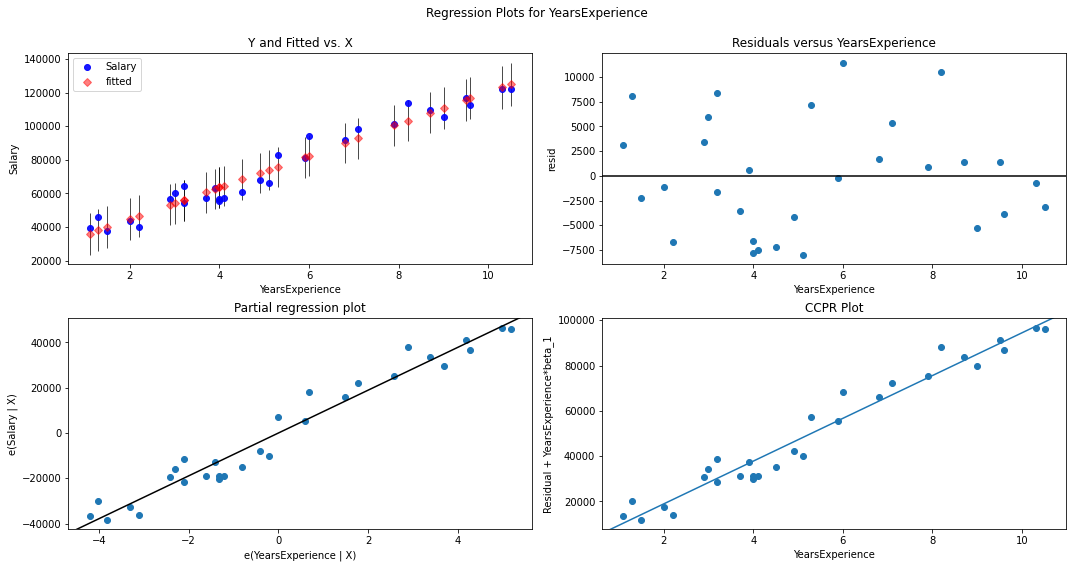

In [77]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'YearsExperience', fig=fig)
plt.show()

***Model Deletion using Cooks Distance and Leverage value***

In [78]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


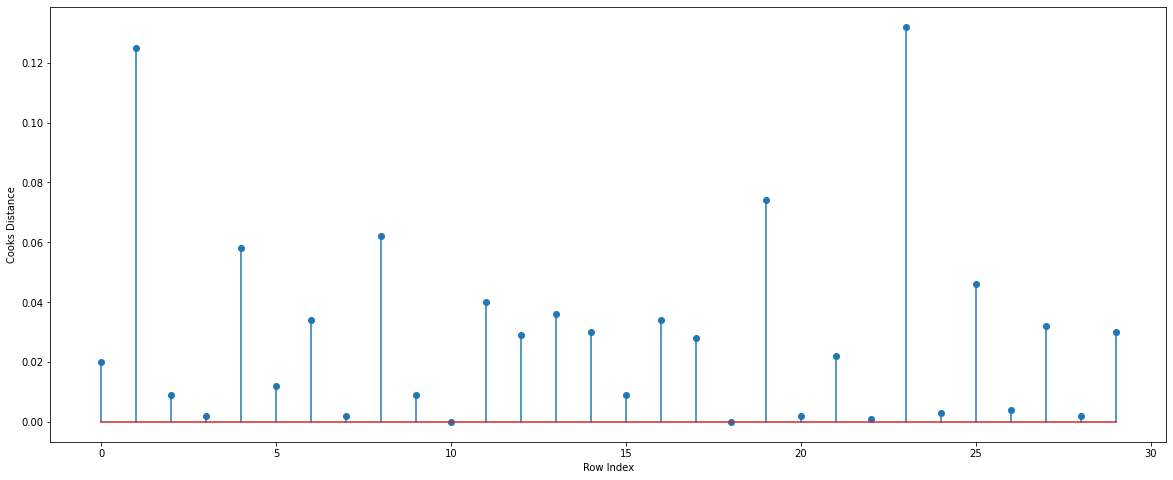

In [79]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(data_s)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [80]:
#index and values of influencers where c is more than .5
(np.argmax(c), np.max(c))

(23, 0.13175452313135258)

High Influence Points

In [81]:
from statsmodels.graphics.regressionplots import influence_plot

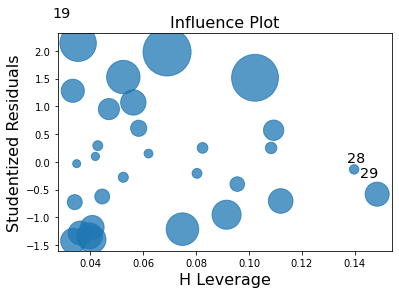

In [82]:
influence_plot(model)
plt.show()

In [85]:
k = data_s.shape[1]
n = data_s.shape[0]
leverage_cutoff = 3*(k+1)/n

In [86]:
leverage_cutoff

0.3

From the above plots, we can conclude that there are no influencers or outliers in dataset. No deletion required

***Prediction***

In [ ]:
#Get predicted value for YearsExperience = 5,10
newdata = pd.Series([5,10])

In [ ]:
data_pred = pd.DataFrame(newdata, columns = ['YearsExperience'])

In [ ]:
data_pred

,YearsExperience
0,5
1,10


In [ ]:
model.predict(data_pred)

0     73042.011806
1    120291.823413
dtype: float64